# Implementation of the famous tipping problem

### Antecedants:
service and quality
### Consequent:
tip

### Rule Base
IF the service was good or the food quality was good, THEN the tip will be high.

IF the service was average, THEN the tip will be medium.

IF the service was poor and the food quality was poor THEN the tip will be low.

For explanation go through https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

/home/satyx/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


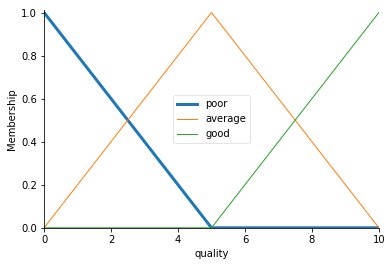

In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt


quality = ctrl.Antecedent(np.arange(0,11,1),'quality')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(0,26,1),'tip')
#print(type(tip.universe))
quality.automf(3)
service.automf(3)

tip['low'] = fuzz.trimf(tip.universe, [0,0,13])
tip['medium'] = fuzz.trimf(tip.universe, [0,13,25])
tip['high'] = fuzz.trimf(tip.universe, [13,25,25])


quality['poor'].view()


/home/satyx/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


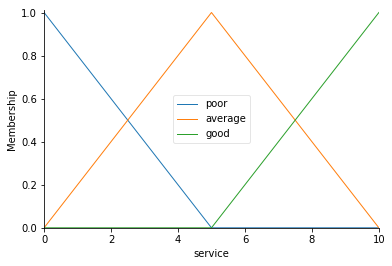

In [2]:
service.view()

/home/satyx/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


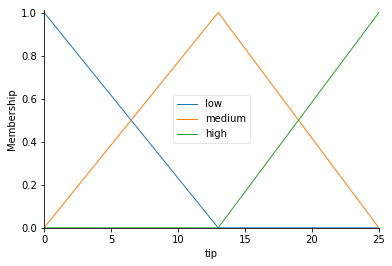

In [3]:
tip.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f111056c2b0>)

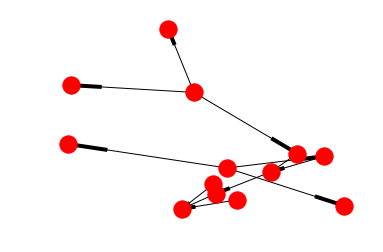

In [4]:
rule_a = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule_b = ctrl.Rule(service['average'], tip['medium'])
rule_c = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule_a.view()

In [5]:
tipping_ctrl = ctrl.ControlSystem([rule_a, rule_b, rule_c])

In [6]:
#tipping_ctrl.addrule(rule_c)
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [7]:

tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

In [8]:
tipping.output['tip']

19.847607361963192